In [1]:
%run F1_classes_func.ipynb

In [2]:
dataset = pd.read_csv(directory + 'dataset.csv')
dataset.head()

,year,name,driverRef,statusId,position,Did not finish,Podium,Pos 4 to 10,Accident / Collision,Finished,...,overtaking prop(driver),overtaking prop(track),pitStop timing prop(driver),pitStop timing prop(race),Medium,Soft,Super Soft,Ultra soft,Hard,clusters
0,2016,Abu Dhabi Grand Prix,hamilton,1.0,1.0,0.00,0.67,0.33,0.0,1.00,...,0.034985,0.064140,0.073046,0.069892,0.0,4.0,2.0,7.0,0.0,2.0
1,2016,Australian Grand Prix,hamilton,1.0,1.0,0.33,0.33,0.33,0.0,0.67,...,0.034985,0.029155,0.073046,0.047411,1.0,6.0,6.0,0.0,0.0,6.0
2,2016,Austrian Grand Prix,hamilton,1.0,1.0,0.00,1.00,0.00,0.0,1.00,...,0.034985,0.058309,0.073046,0.065510,0.0,2.0,3.0,8.0,0.0,1.0
3,2016,Azerbaijan Grand Prix,hamilton,1.0,10.0,0.00,0.00,0.33,0.0,1.00,...,0.034985,0.063218,0.073046,0.069127,1.0,4.0,8.0,0.0,0.0,14.0
4,2016,Bahrain Grand Prix,hamilton,1.0,1.0,0.00,0.67,0.33,0.0,1.00,...,0.034985,0.064140,0.073046,0.075178,1.0,6.0,6.0,0.0,0.0,15.0


## Class distribution for each race

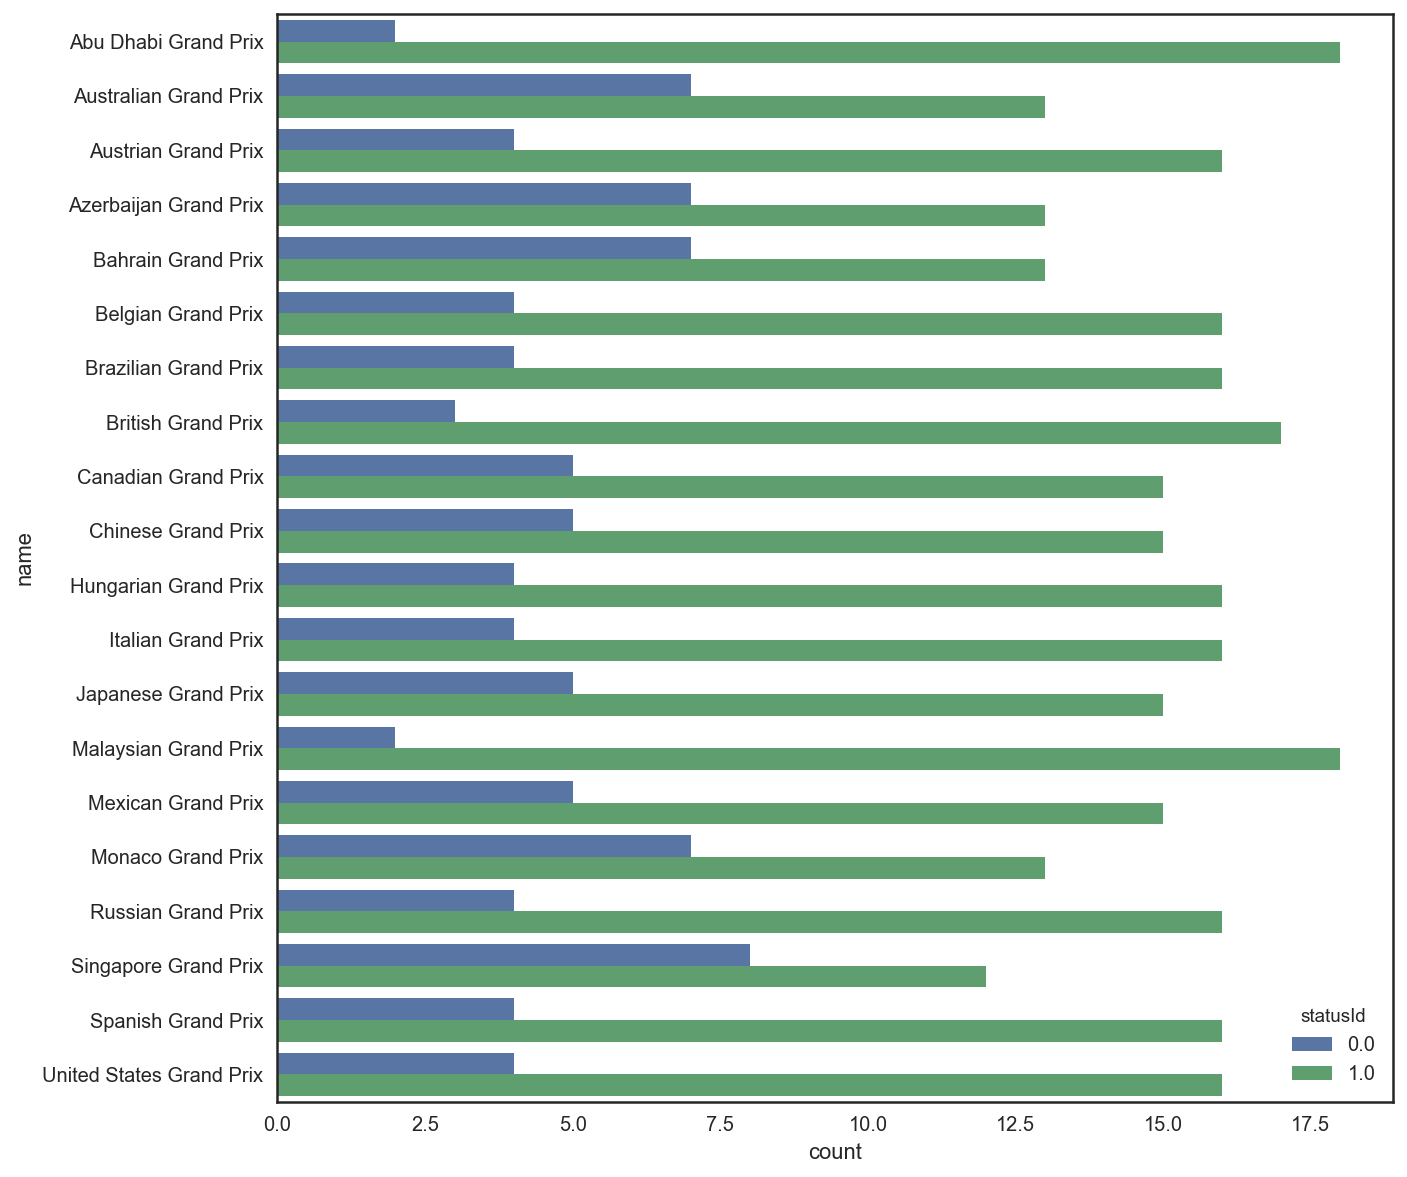

In [3]:
plt.figure(figsize=(10,10))
sns.countplot(y="name", hue="statusId", data=dataset[dataset['year'] == 2017])

### Which tracks are more prone to drivers not finishing?

In [4]:
t= pd.DataFrame(dataset.groupby('name')['statusId'].mean()).reset_index()

# Define the sorter
sorter = races

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort
# the dataframe numerically
t['name_Rank'] = t['name'].map(sorterIndex)

t.sort_values(['name_Rank'], ascending = True, inplace = True)

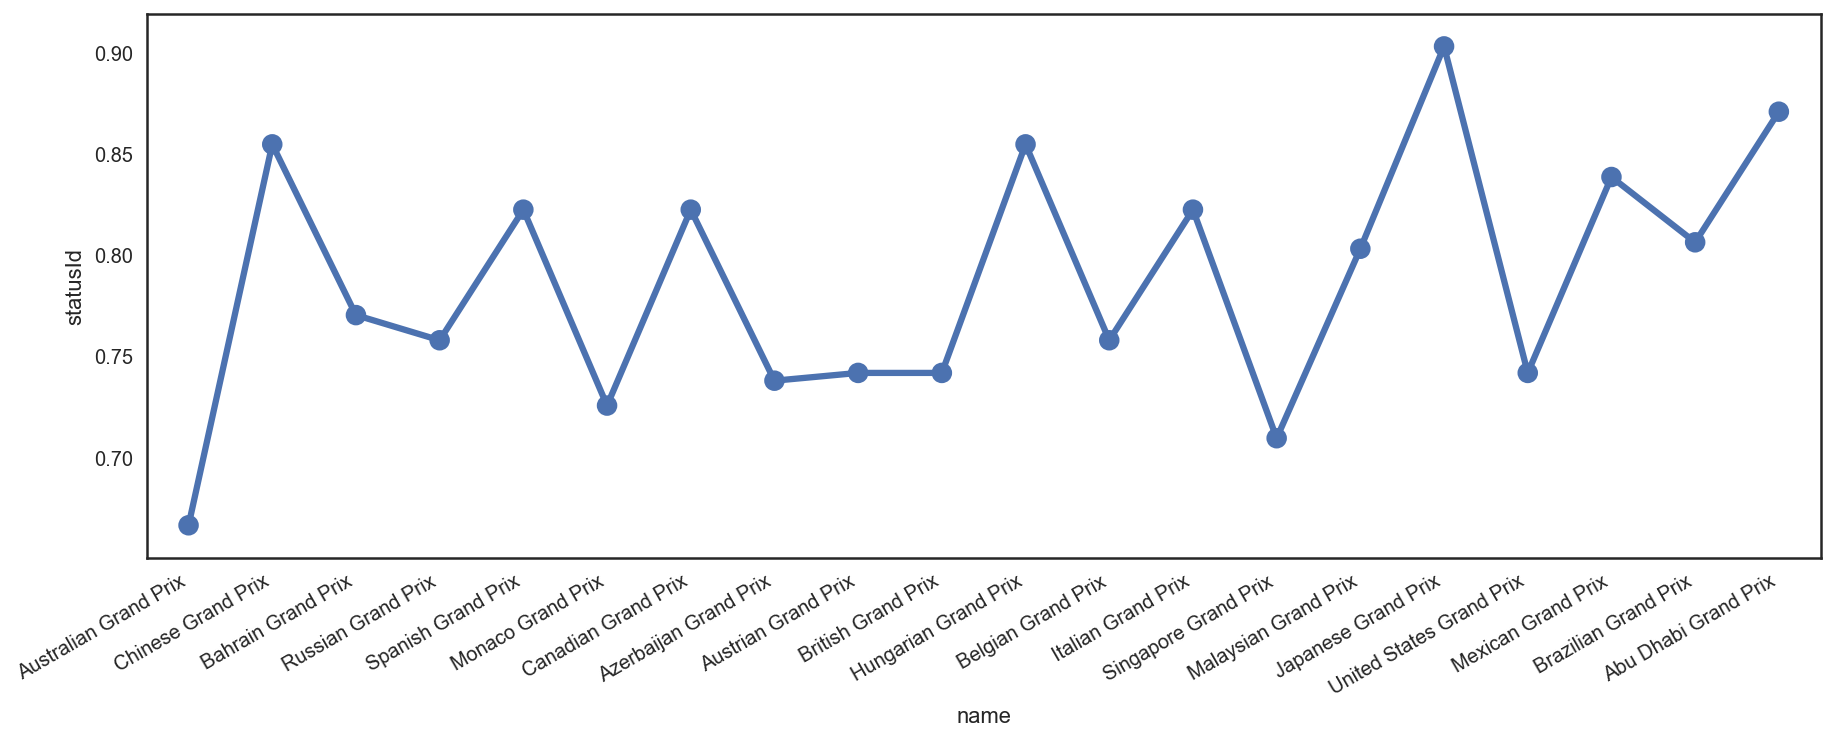

In [5]:
plt.figure(figsize=(15,5))
g = sns.pointplot(x="name", y="statusId", data=t)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

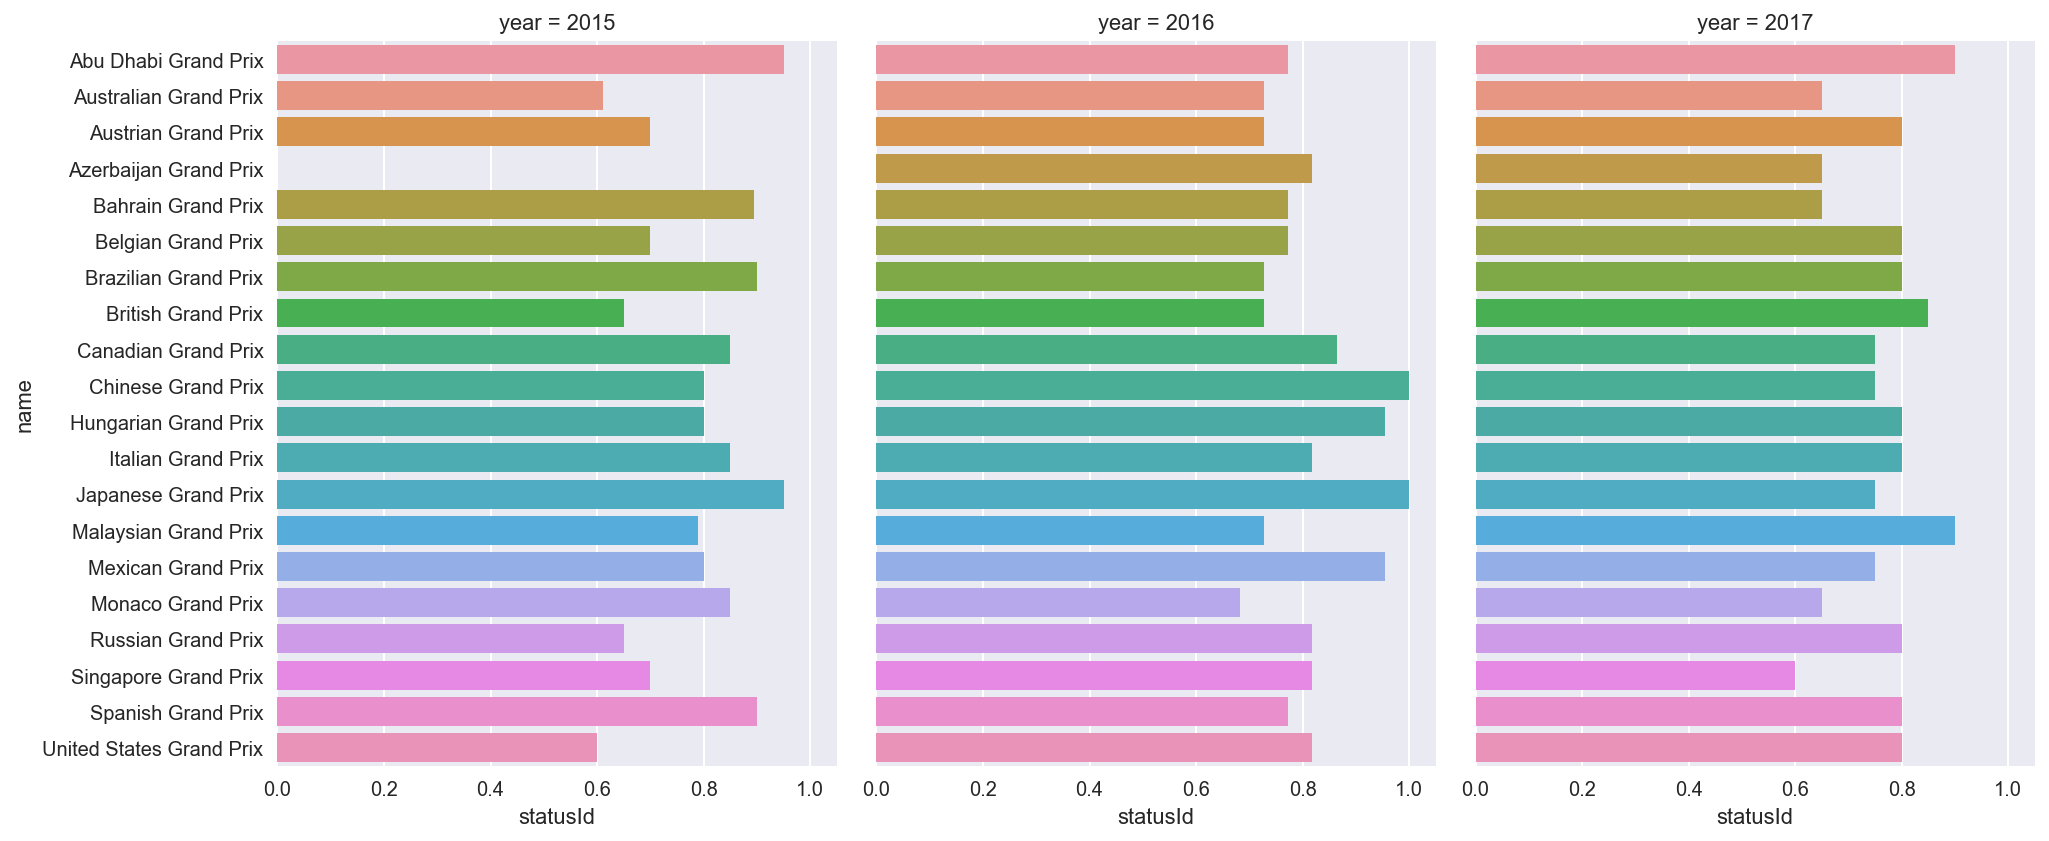

In [6]:
race_finish_grp = pd.DataFrame(dataset.groupby(['name', 'year'])['statusId'].mean()).reset_index()
race_finish_grp

sns.set(font_scale=1)
g = sns.factorplot(x="statusId", y='name', col='year', kind="bar", orient='h',
                   data=race_finish_grp, size=6, aspect=0.8)

### Which drivers are more prone to not finishing a race?

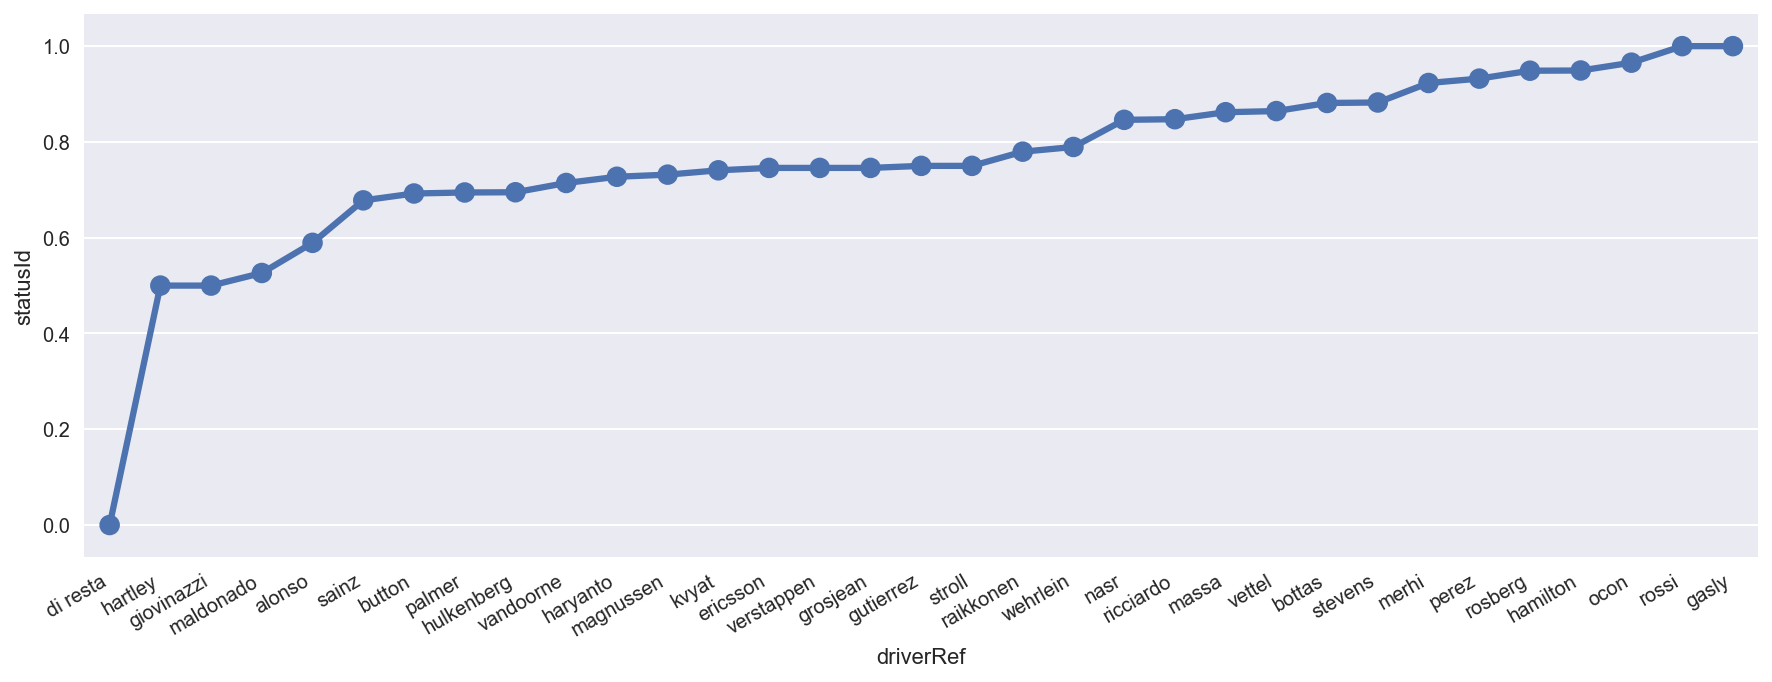

In [7]:
d = pd.DataFrame(dataset.groupby('driverRef')['statusId'].mean().sort_values(ascending=True)).reset_index()
plt.figure(figsize=(15,5))
g = sns.pointplot(x="driverRef", y="statusId", data=d)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

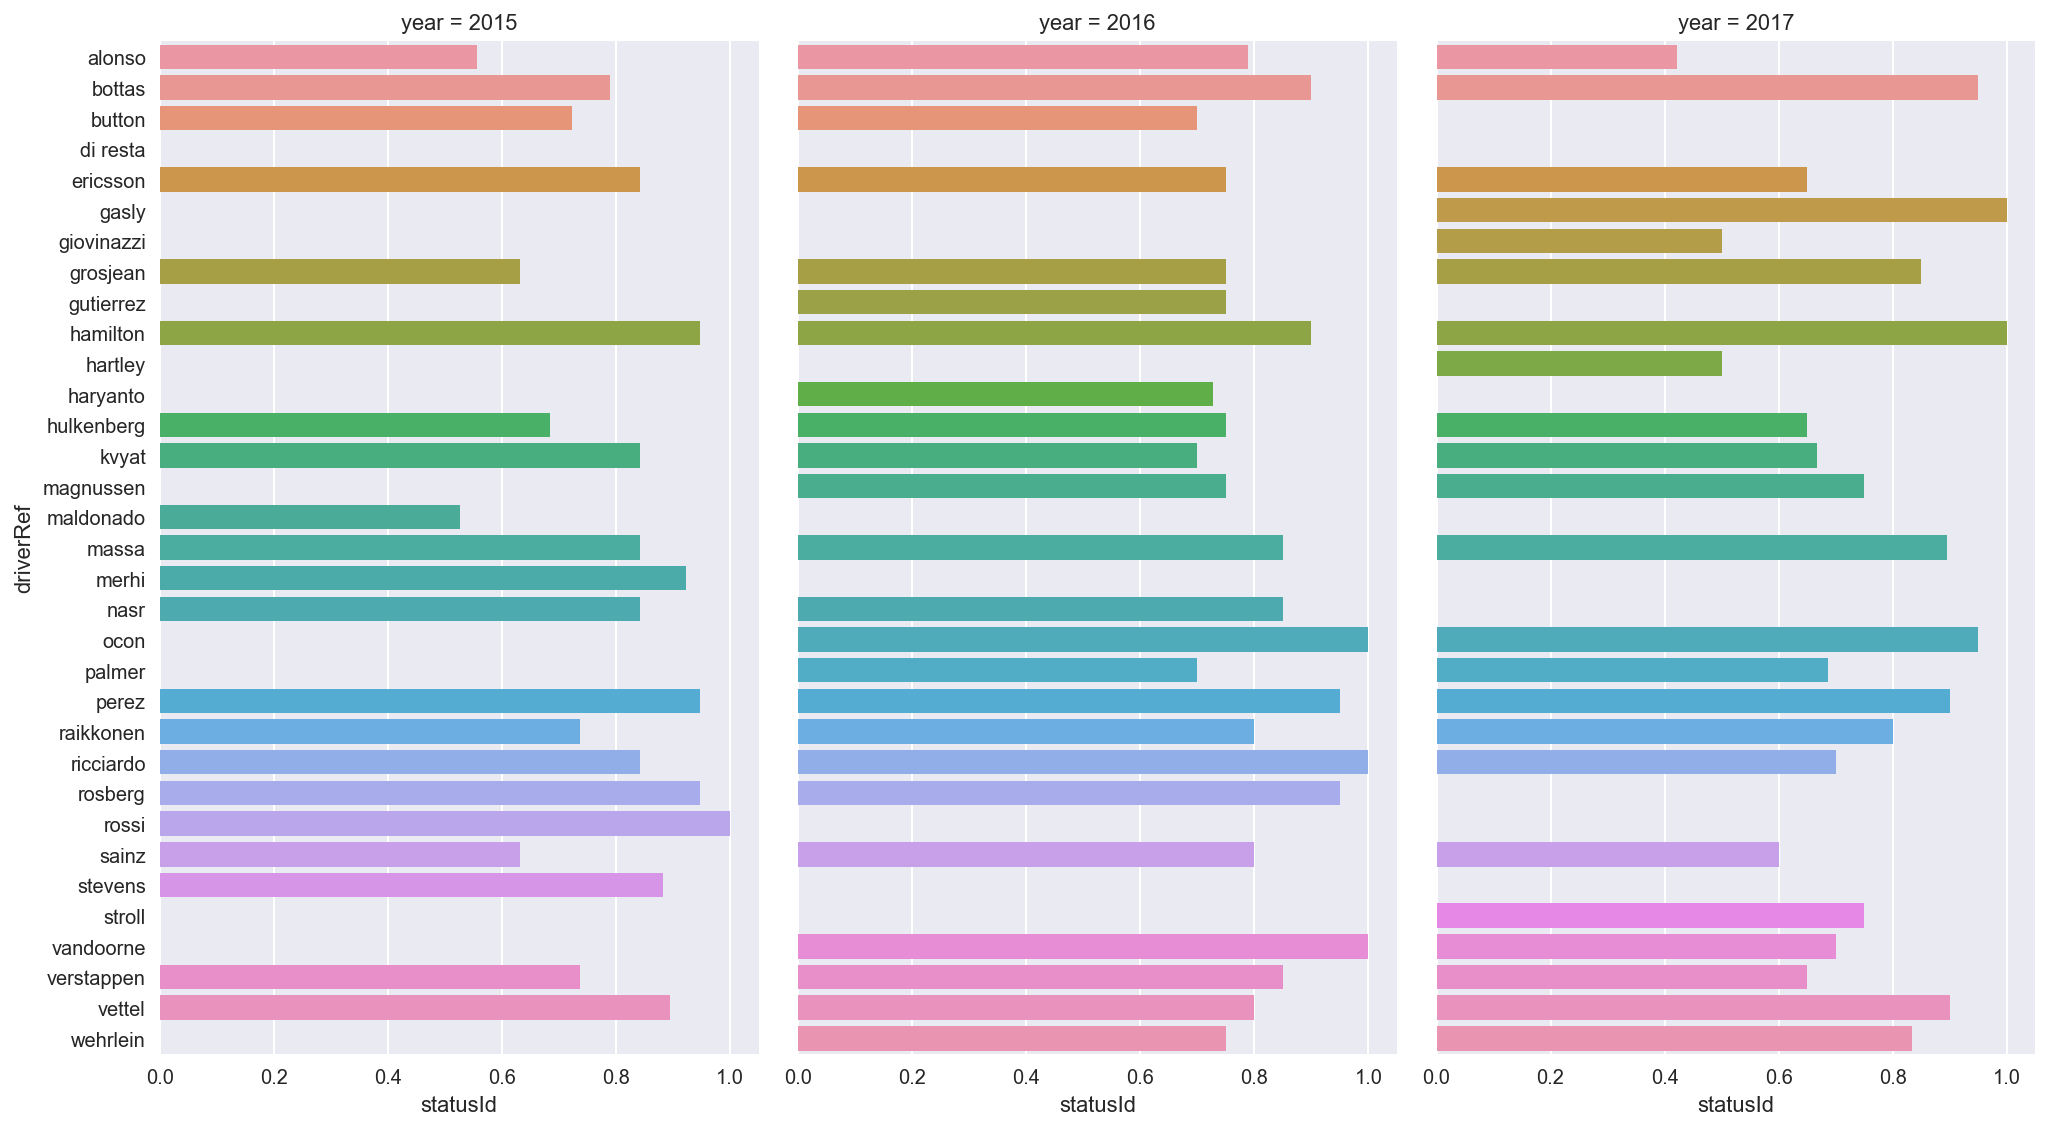

In [8]:
driver_finish_grp = pd.DataFrame(dataset.groupby(['driverRef', 'year'])['statusId'].mean()).reset_index()
sns.set(font_scale=1)
g = sns.factorplot(x="statusId", y='driverRef', col='year', kind="bar", orient='h',
                   data=driver_finish_grp, size=8, aspect=0.6)

## How well do the predictors relate to the target variable?

In [9]:
df = dataset.drop(index_list+target_var_list, axis=1)

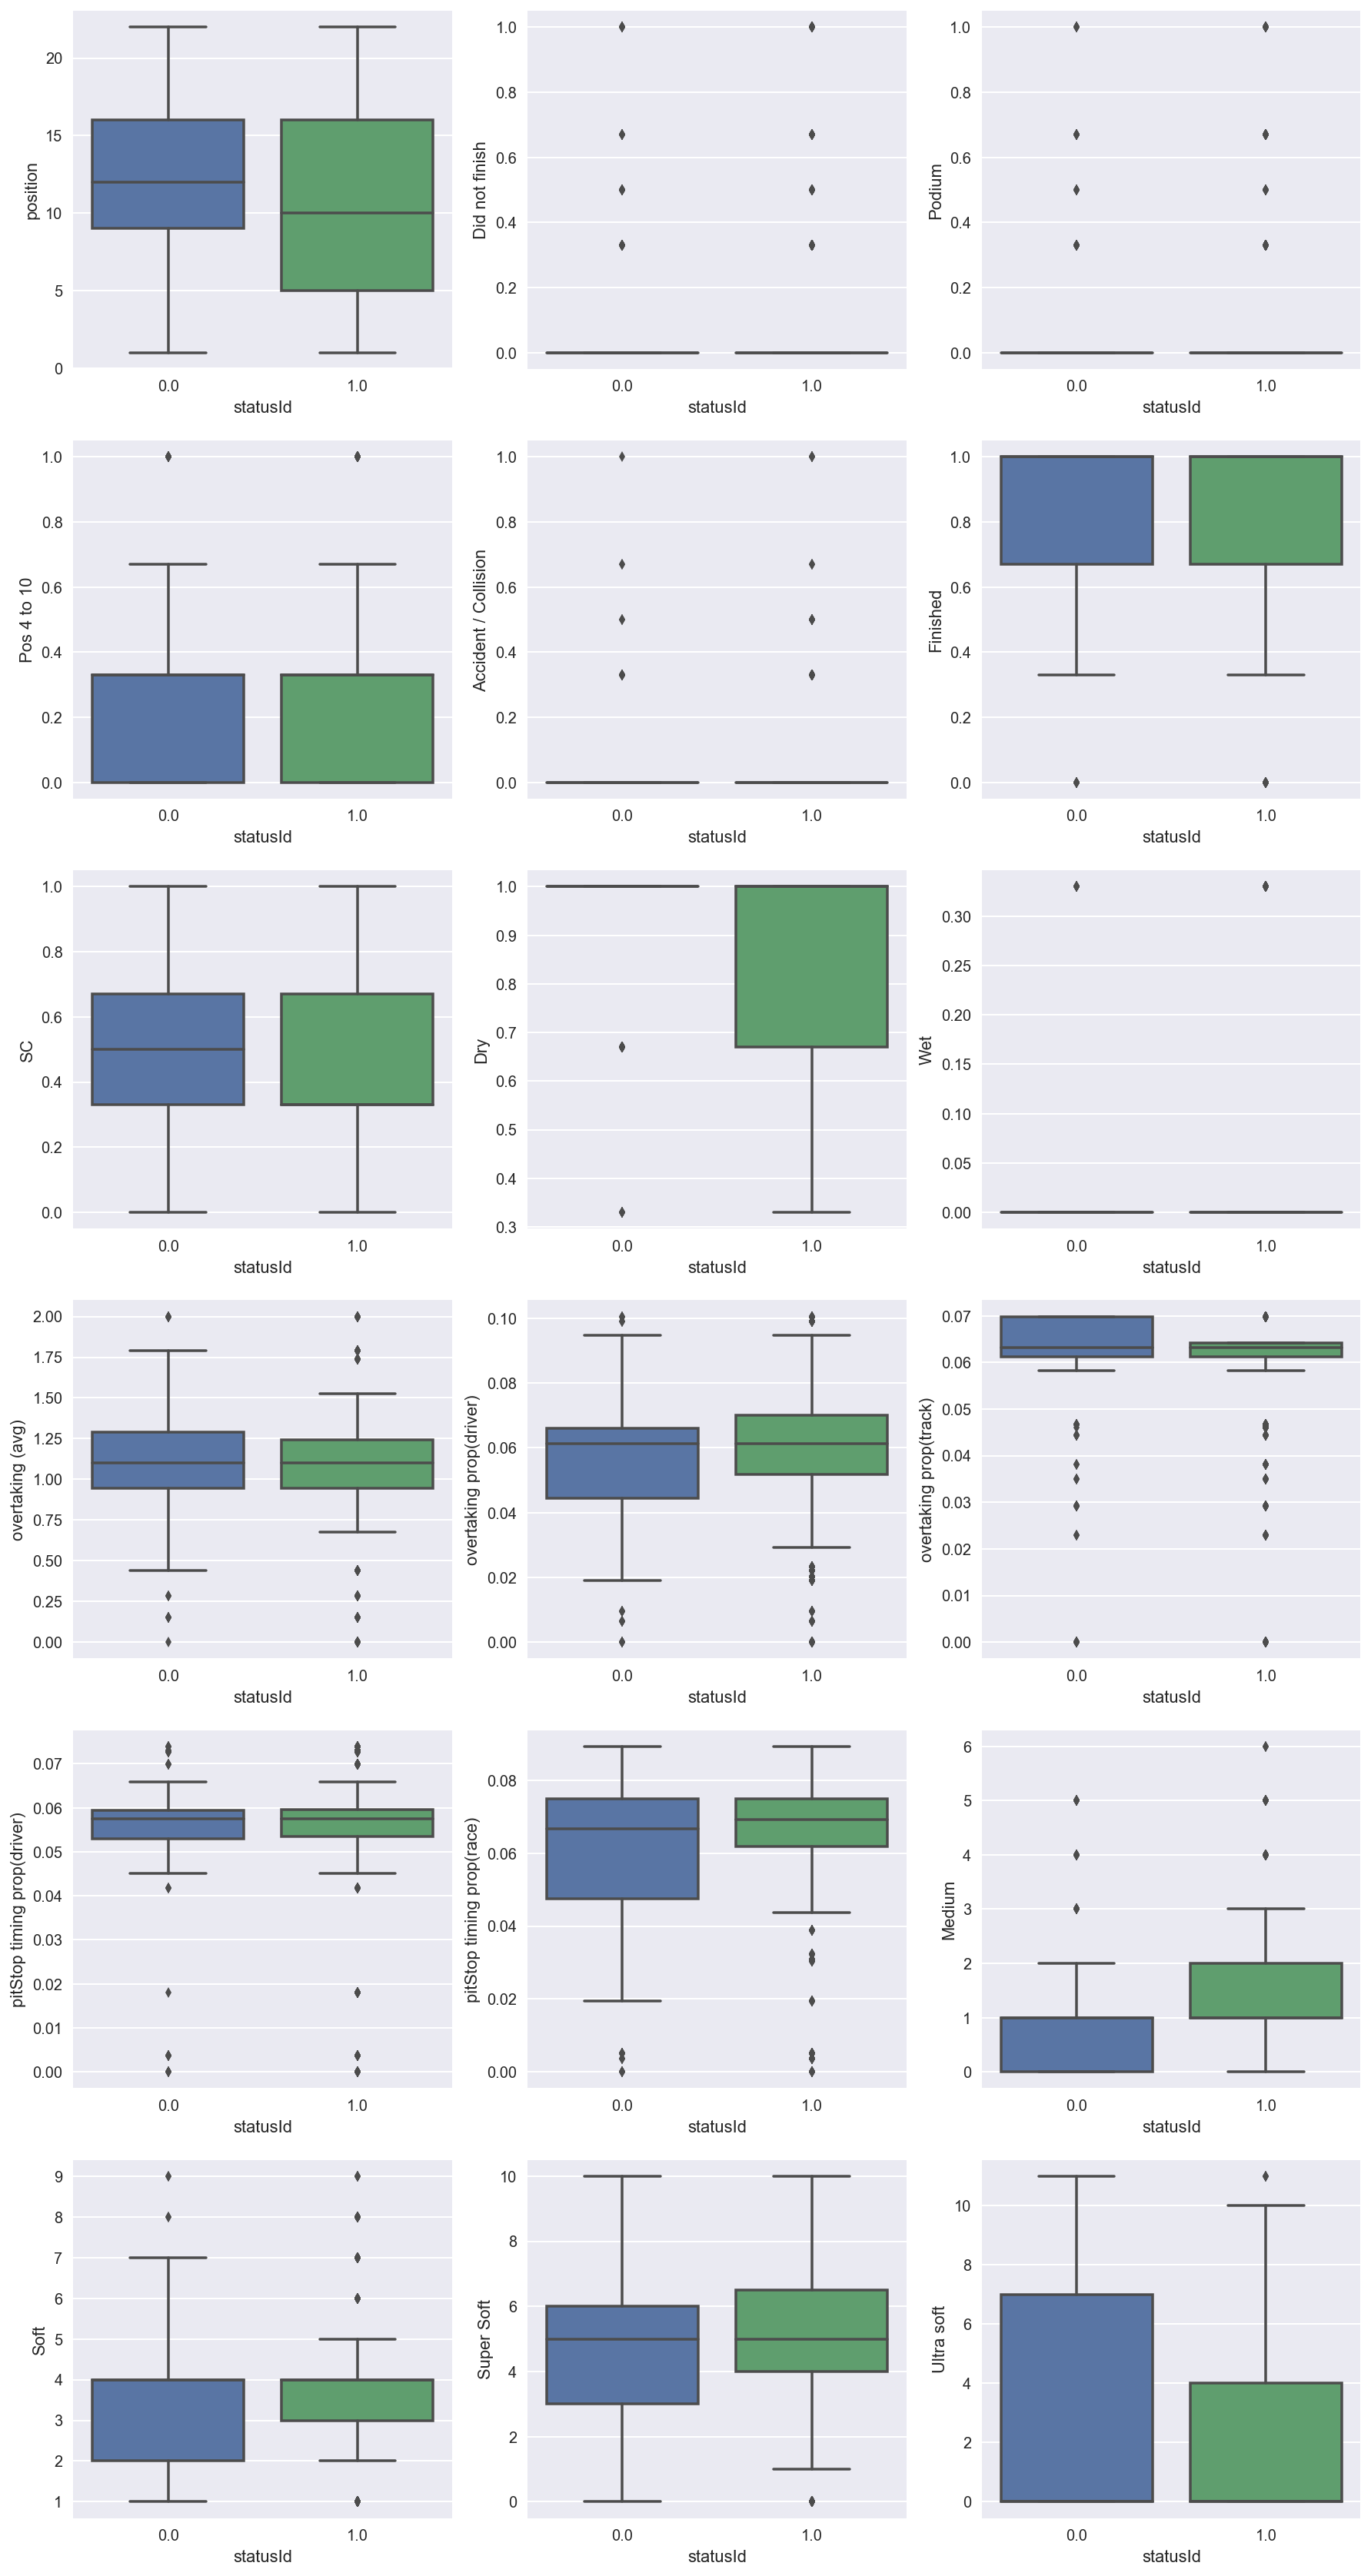

In [10]:
nrows = len(df.columns)//3
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(15,30))

i=0
for row in range(nrows):
    for col in range(ncols):
        g = sns.boxplot(y=df.iloc[:,i], x=dataset['statusId'], ax=axes[row][col])
        i=i+1

/Users/dianaow/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


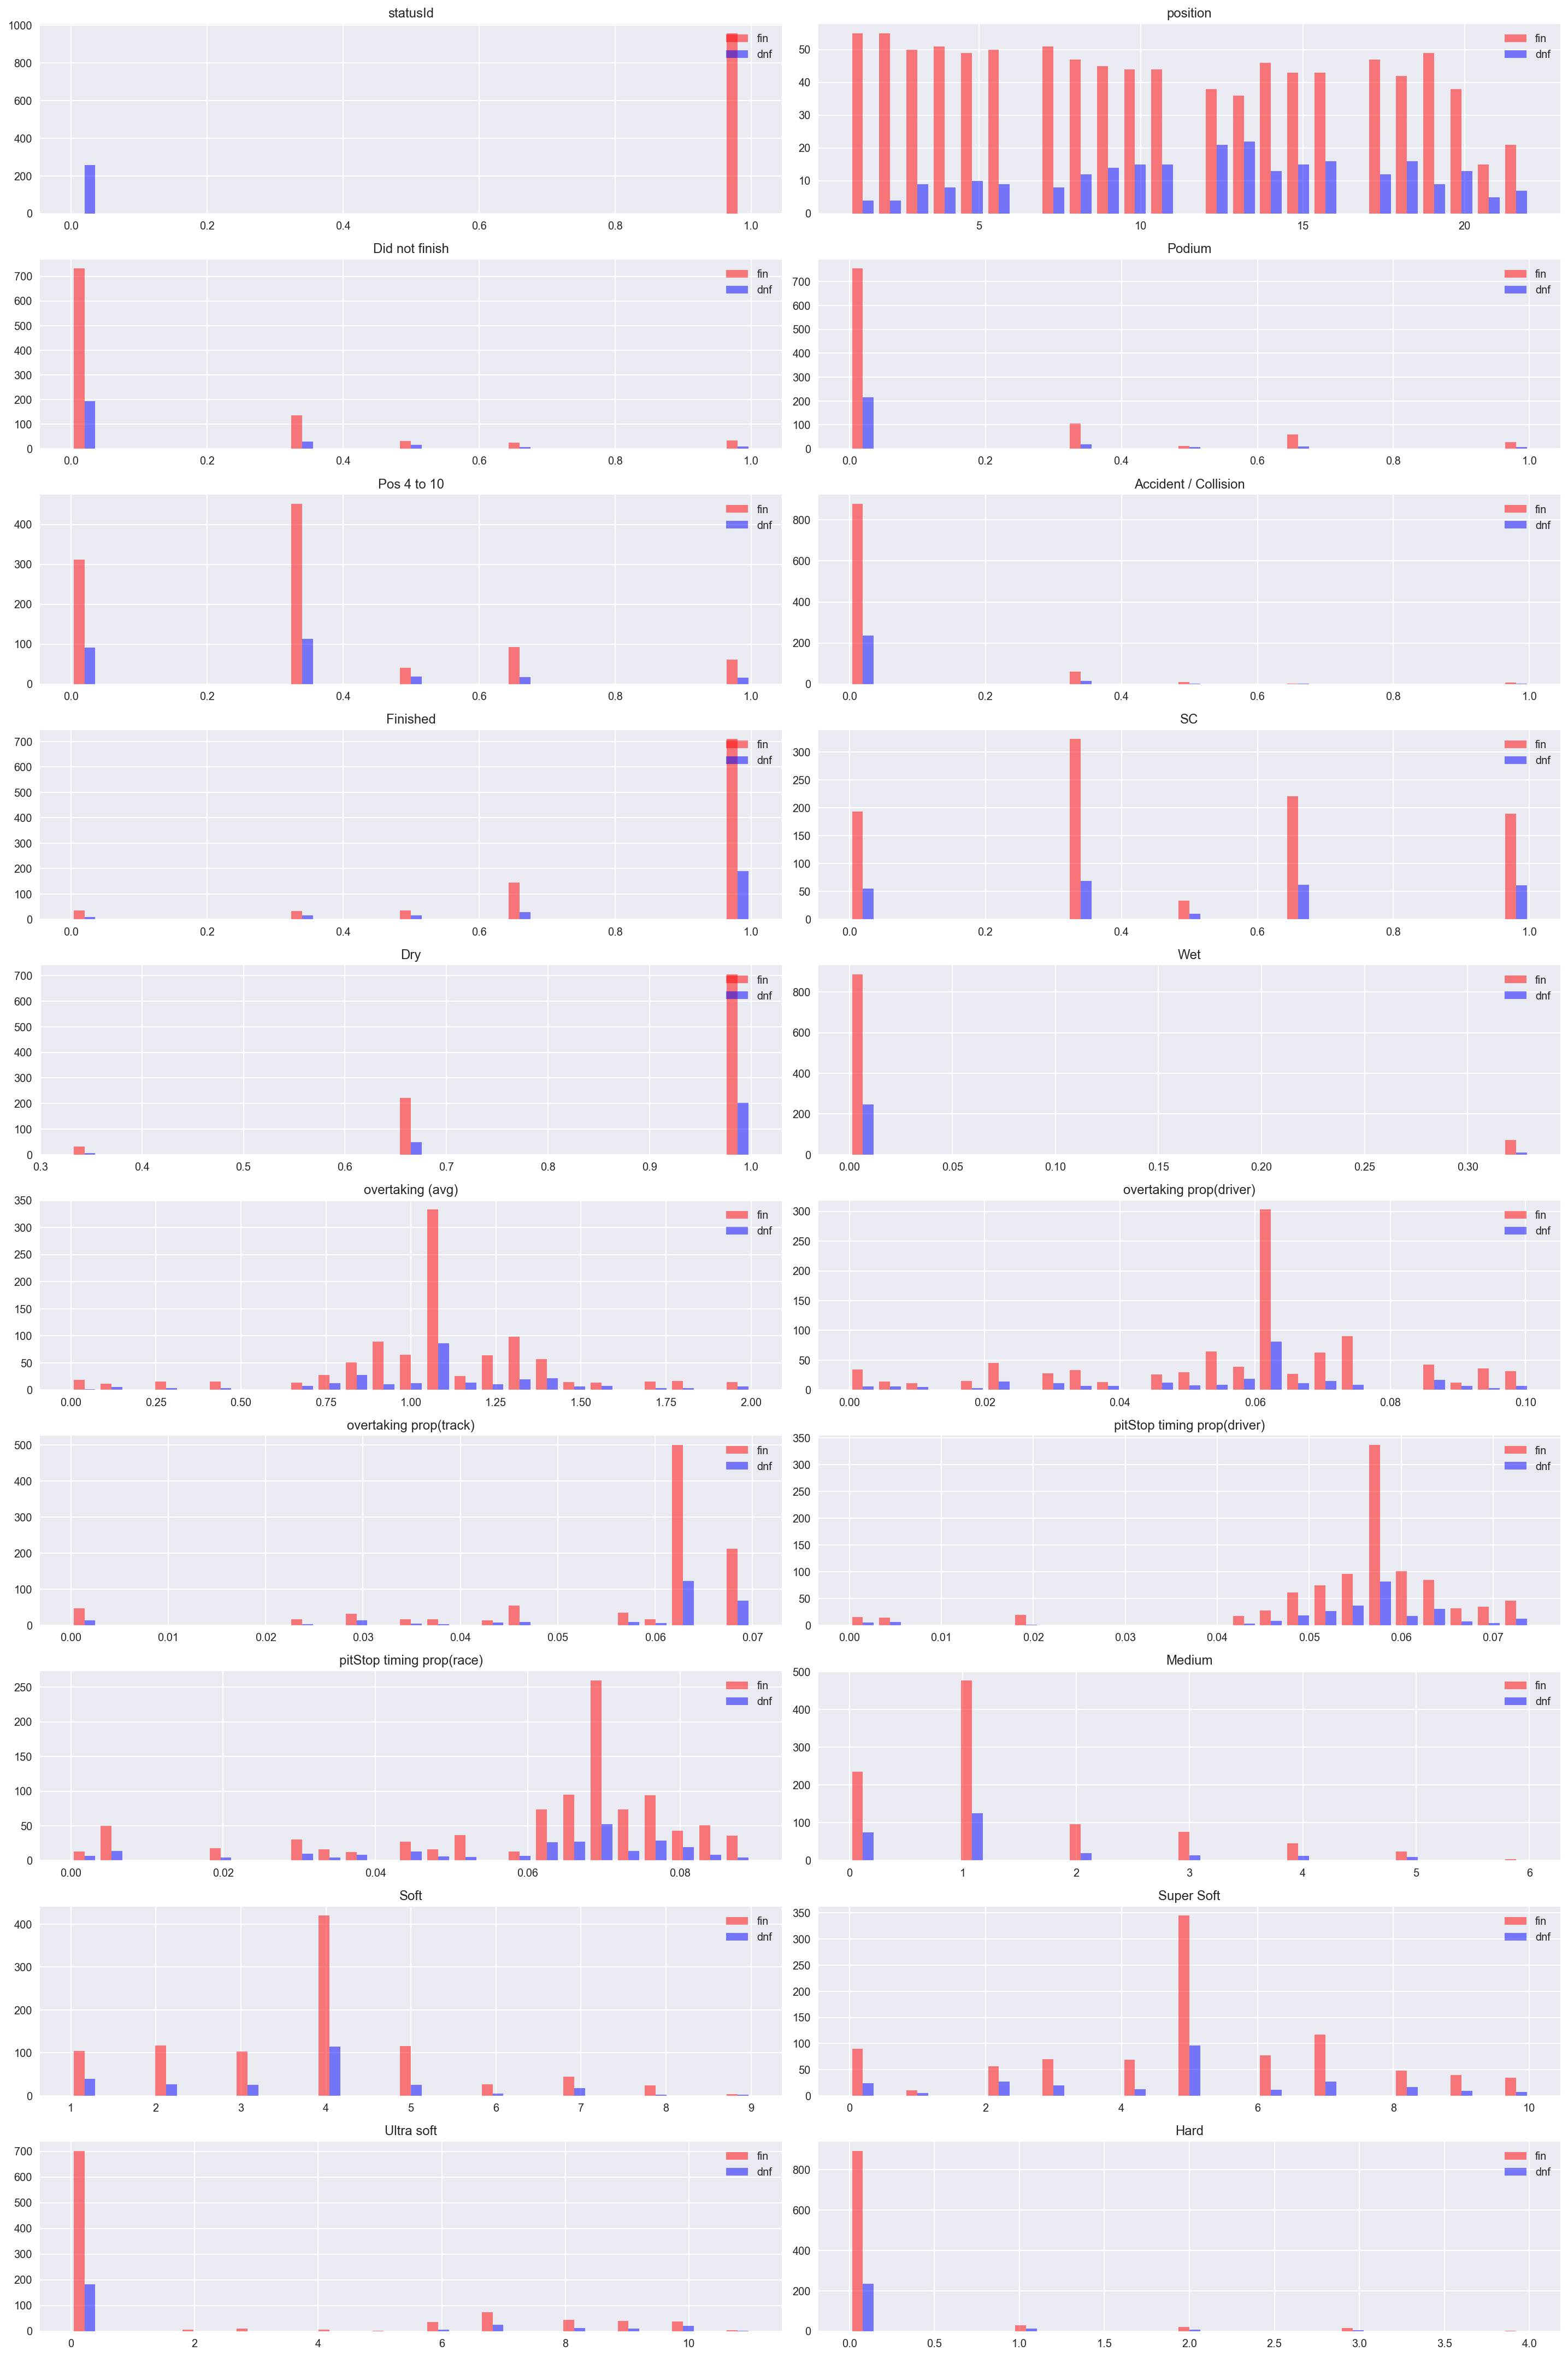

In [11]:
df1 = dataset.drop(index_list, axis=1)

def sephist(df, col):
    yes = df[df['statusId'] == 1][col]
    no = df[df['statusId'] == 0][col]
    return yes, no

plt.figure(figsize=(20,30))
for num in range(len(df1.columns)-1):
    plt.subplot(len(df1.columns)//2, 2, num+1)
    plt.hist((sephist(df1, df1.iloc[:,num].name)[0], sephist(df1, df1.iloc[:,num].name)[1]), bins=25, alpha=0.5, label=['fin', 'dnf'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title(df1.iloc[:,num].name)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)

In [12]:
SS = StandardScaler()

Xs_train = pd.DataFrame(SS.fit_transform(df))
Xs_train.columns = df.columns

Xs_train_new = pd.concat([Xs_train.reset_index(drop=True), dataset[target_var_list].reset_index(drop=True)], axis=1)

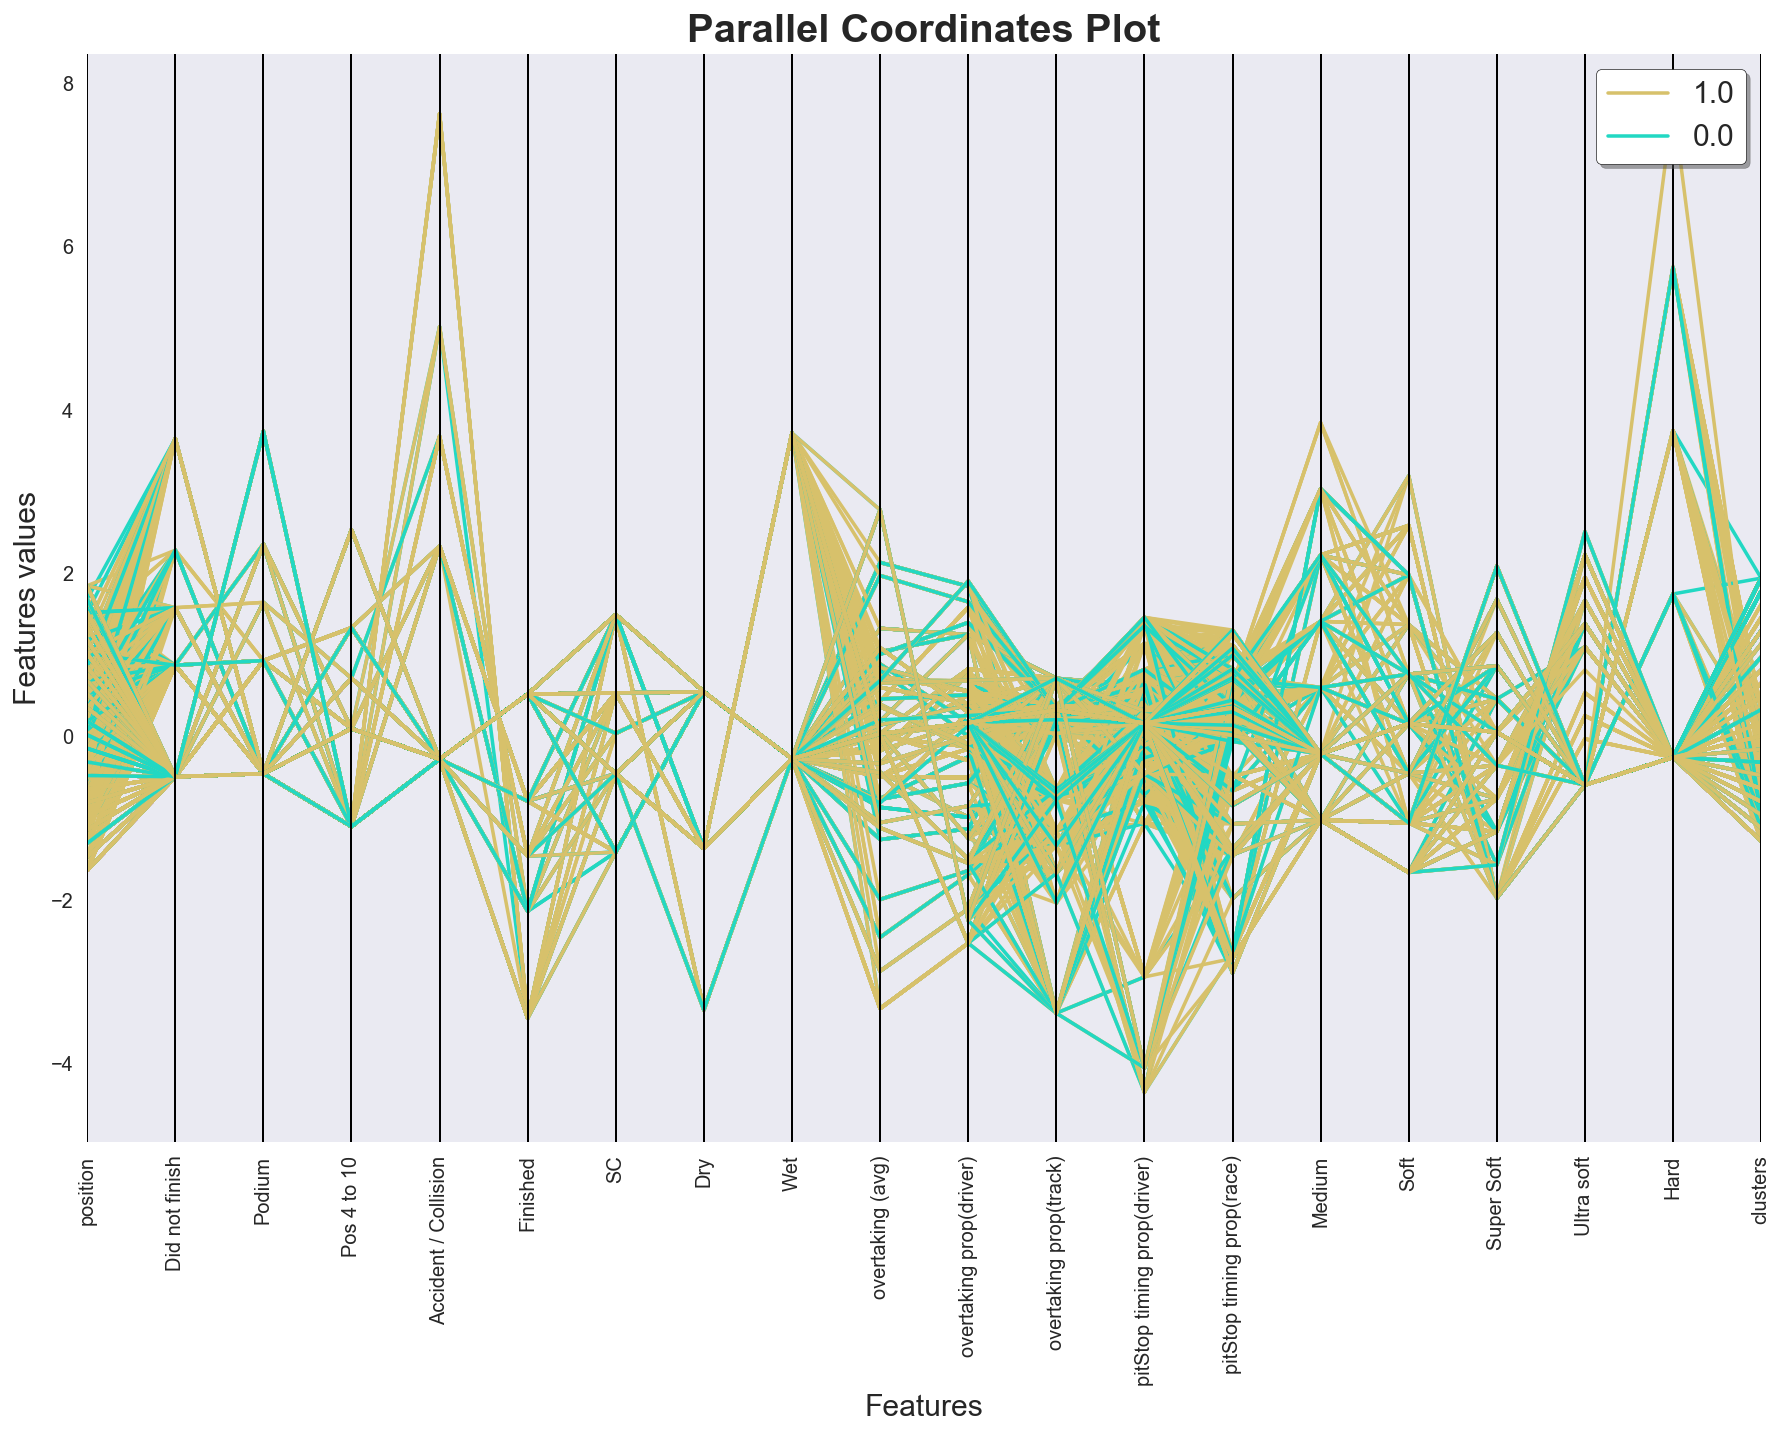

In [13]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(Xs_train_new, "statusId")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.xticks(rotation=90)
plt.show()

In [14]:
from pandas.tools.plotting import radviz

/Users/dianaow/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


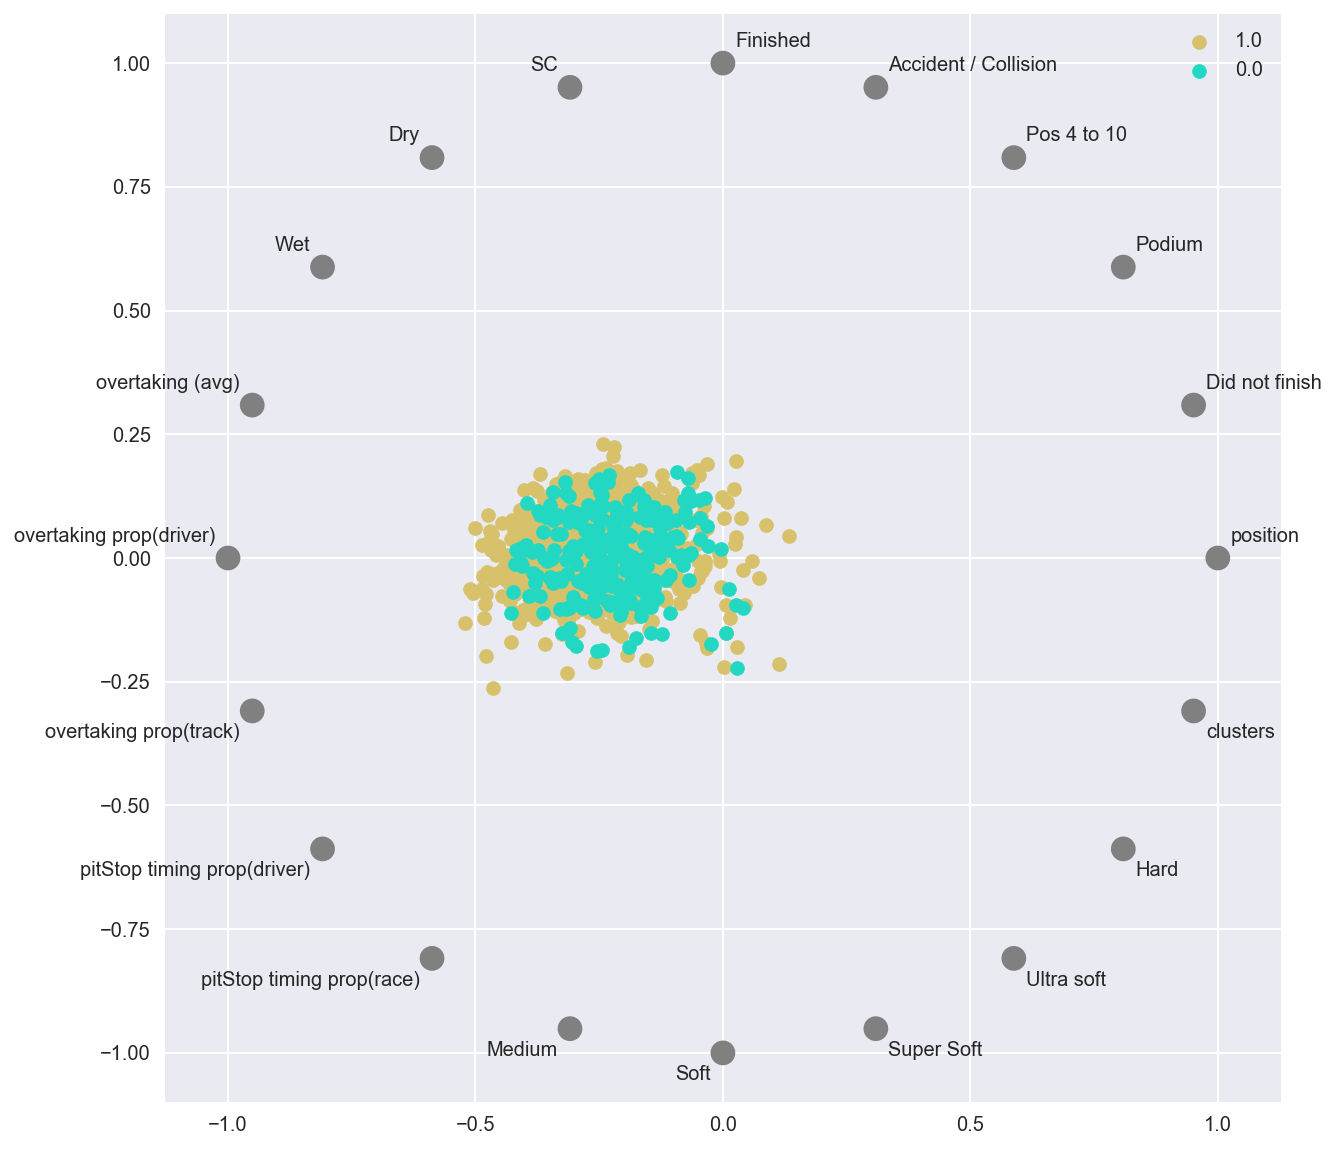

In [15]:
plt.figure(figsize=(10,10))
radviz(Xs_train_new, 'statusId')
plt.show()

### Observation:
There is no clear linear relationship between any features and the target variable, and from the radviz diagrame above where the 2 classes almost overlap, it suggests that classification will be difficult

## Trend of features over the seasons (2015-2017)

#### Comparison of track's pitStop timing

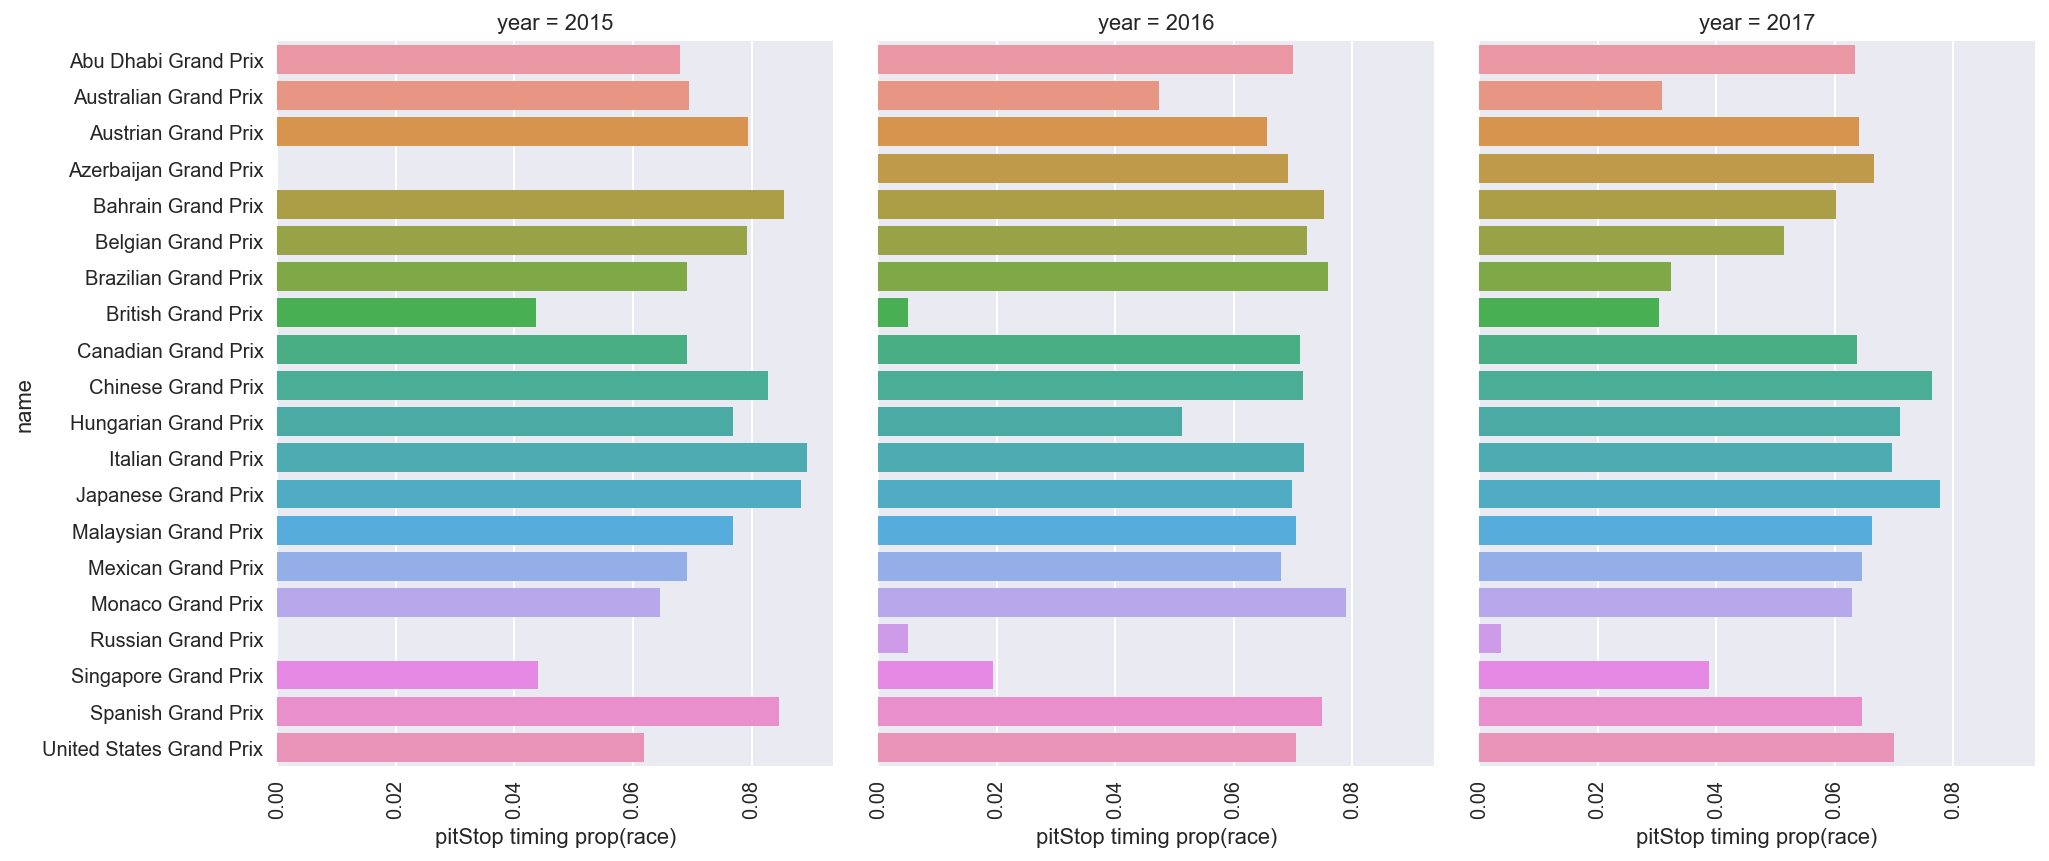

In [16]:
sns.set(font_scale=1)
g = sns.factorplot(x="pitStop timing prop(race)", y='name', col='year', kind="bar", orient='h',
                   data=dataset, size=6, aspect=0.8)
g.set_xticklabels(rotation=90)

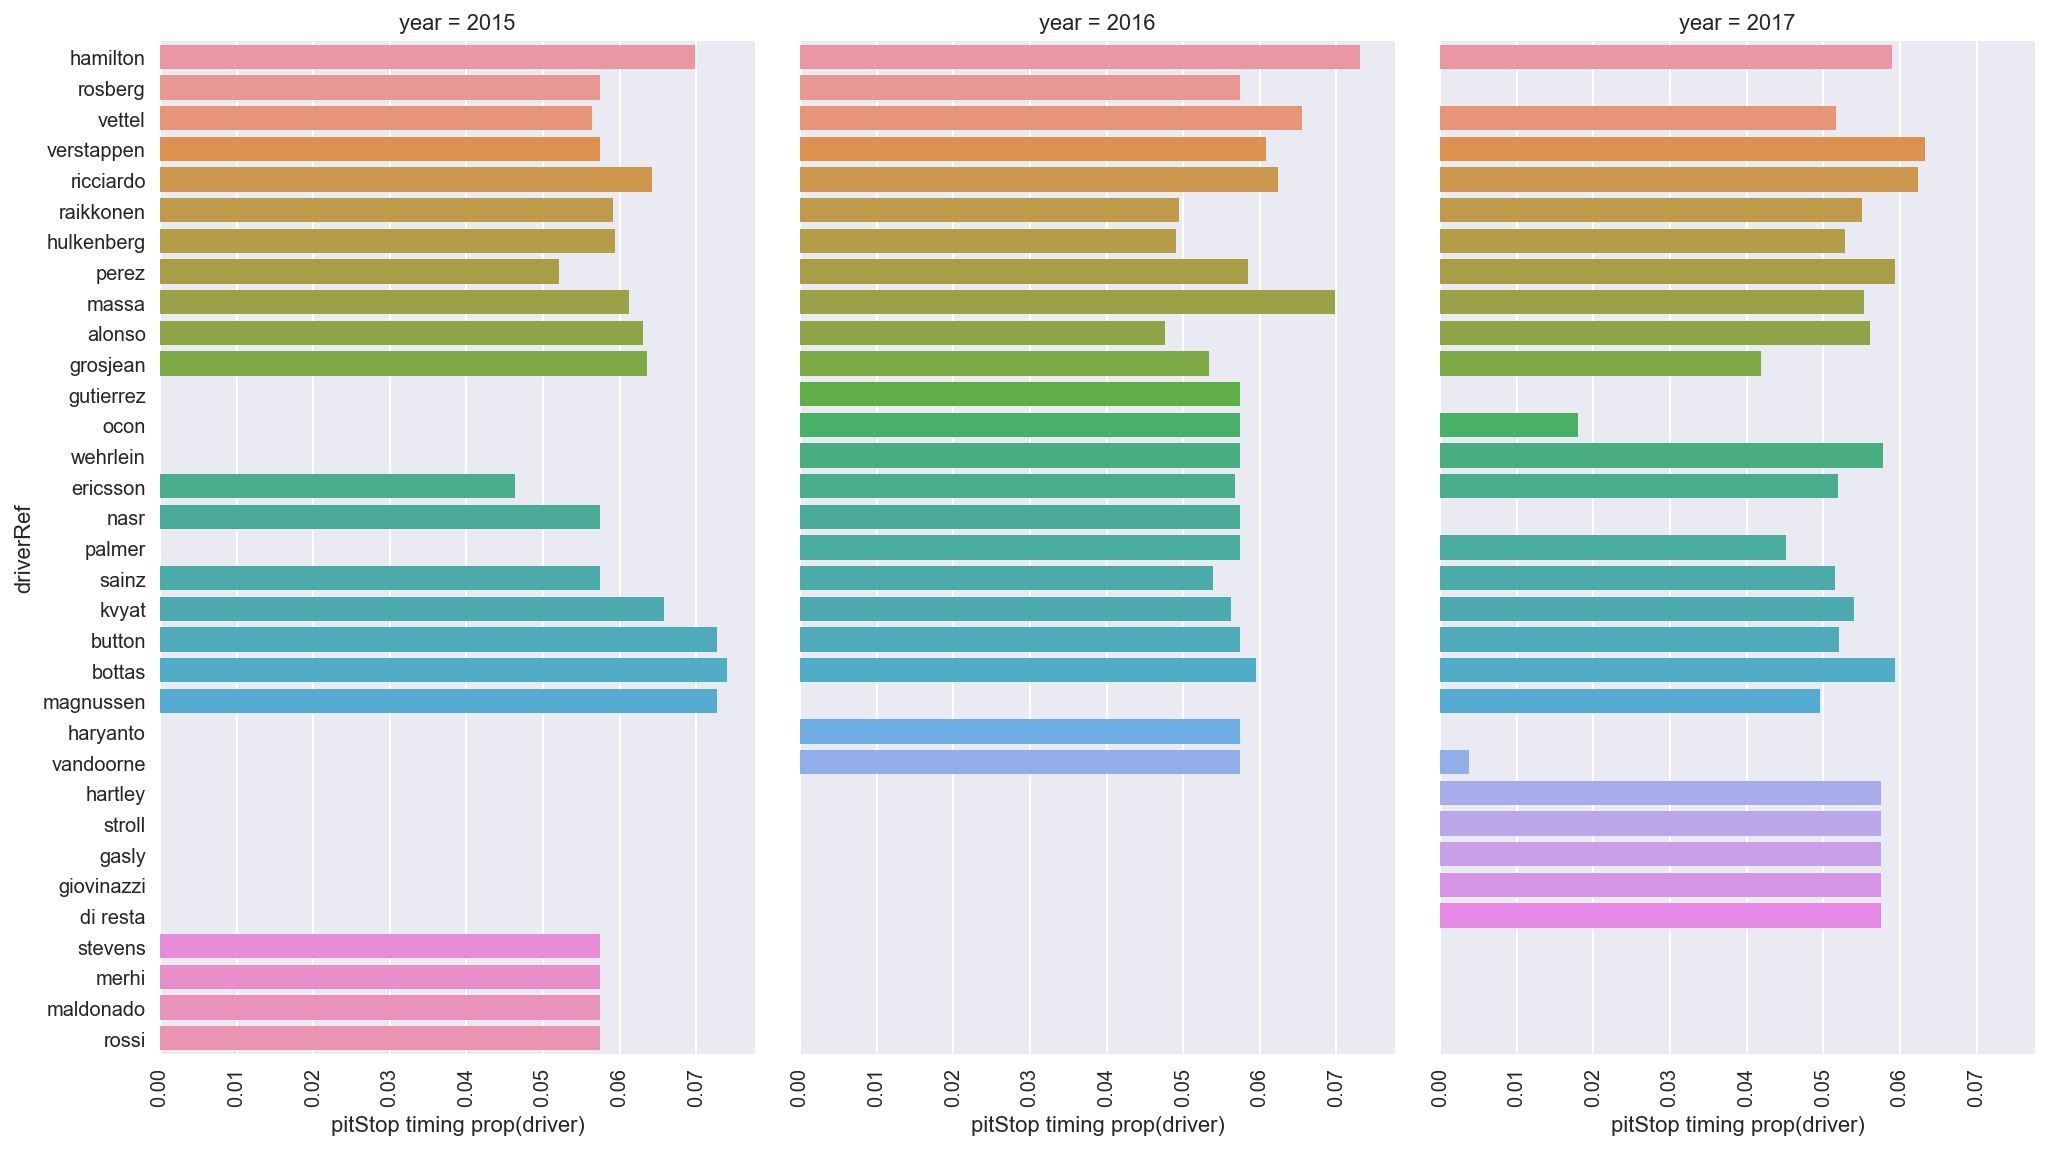

In [17]:
sns.set(font_scale=1)
g = sns.factorplot(x="pitStop timing prop(driver)", y='driverRef', col='year', kind="bar", orient='h',
                   data=dataset, size=8, aspect=0.6)
g.set_xticklabels(rotation=90)

#### Comparison of drivers' overtaking rate

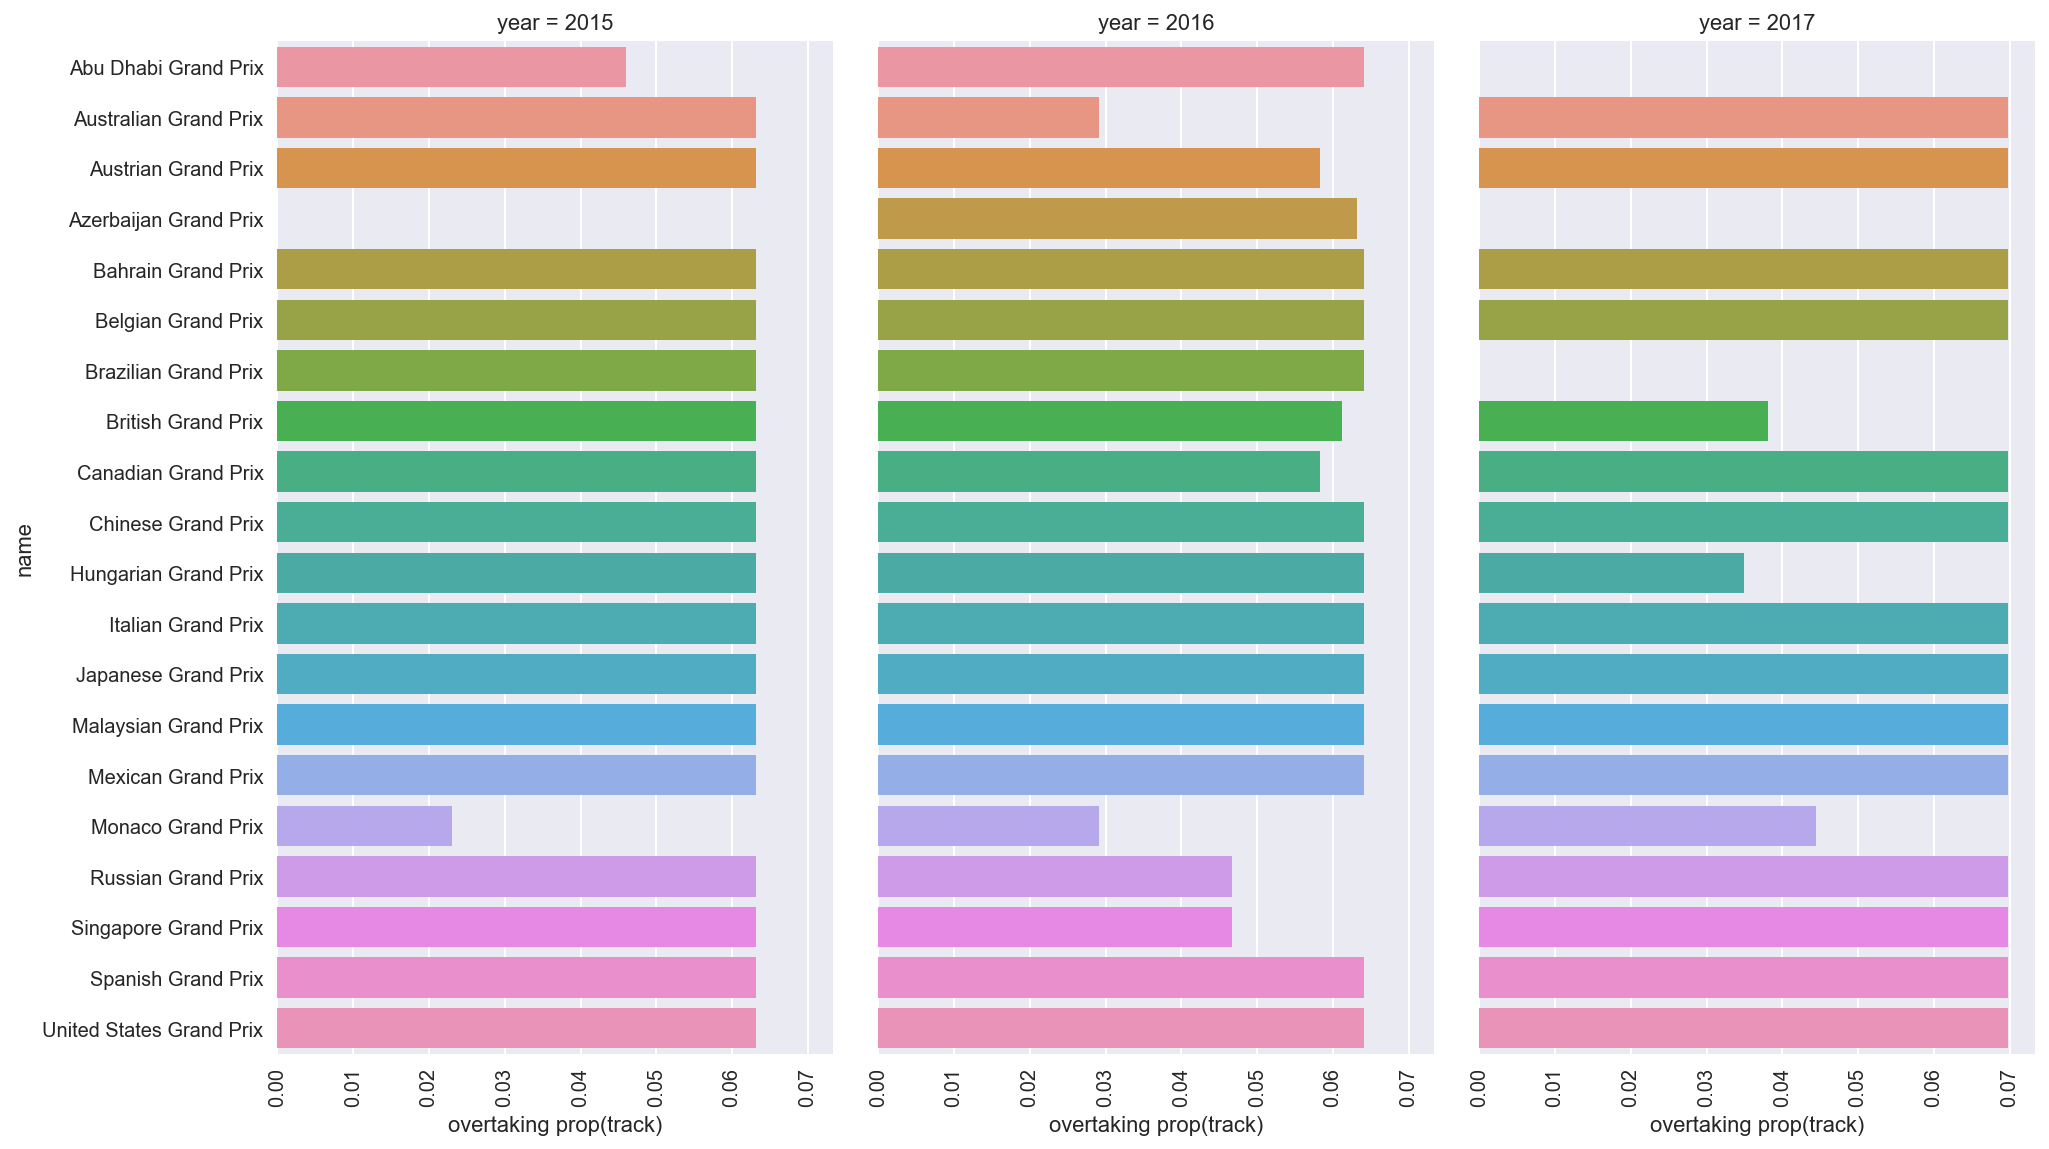

In [18]:
sns.set(font_scale=1)
g = sns.factorplot(x="overtaking prop(track)", y='name', col='year', kind="bar", orient='h',
                   data=dataset, size=8, aspect=0.6)
g.set_xticklabels(rotation=90)

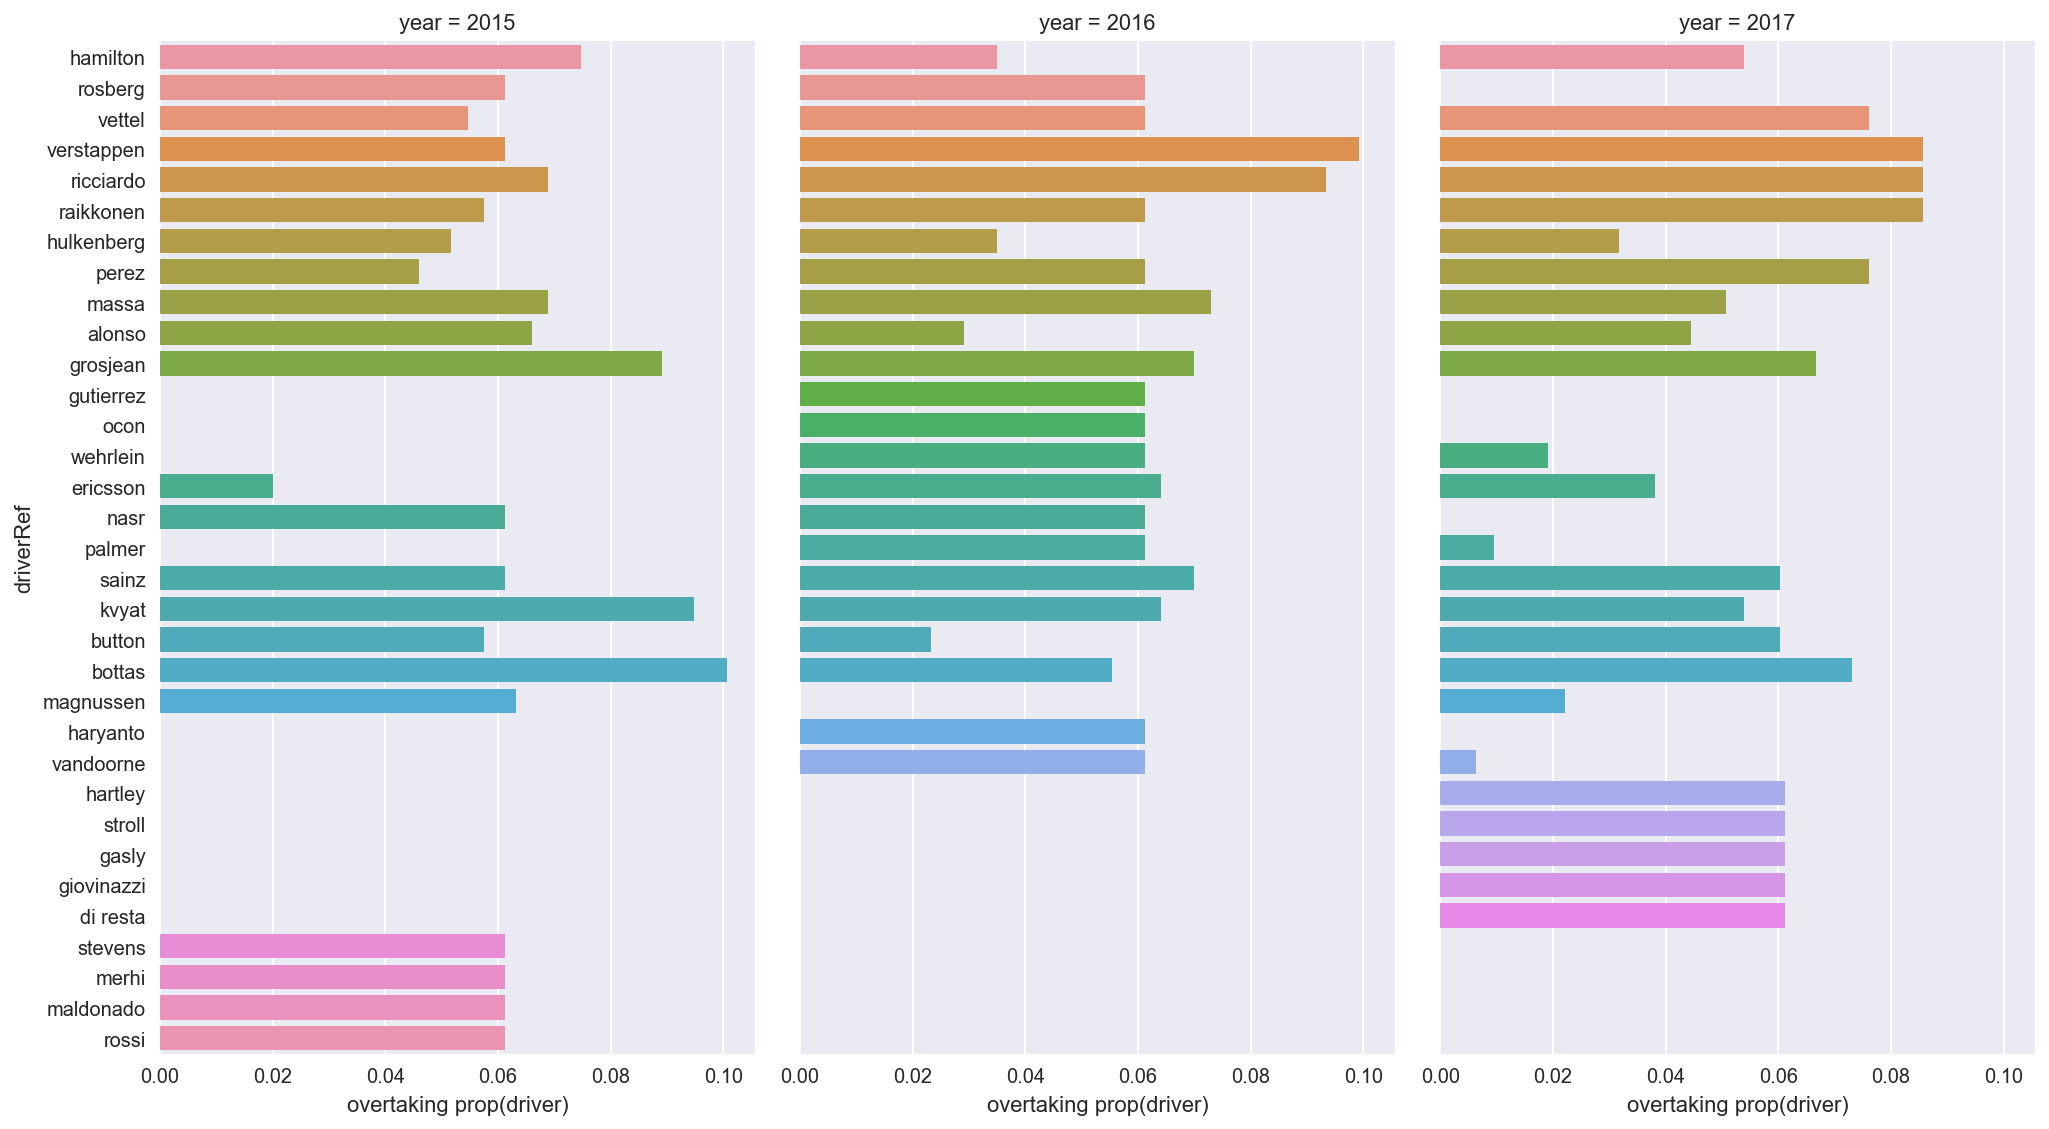

In [19]:
sns.set(font_scale=1)
g = sns.factorplot(y='driverRef', x="overtaking prop(driver)", col='year', kind="bar", orient='h',
                   data=dataset, size=8, aspect=0.6)

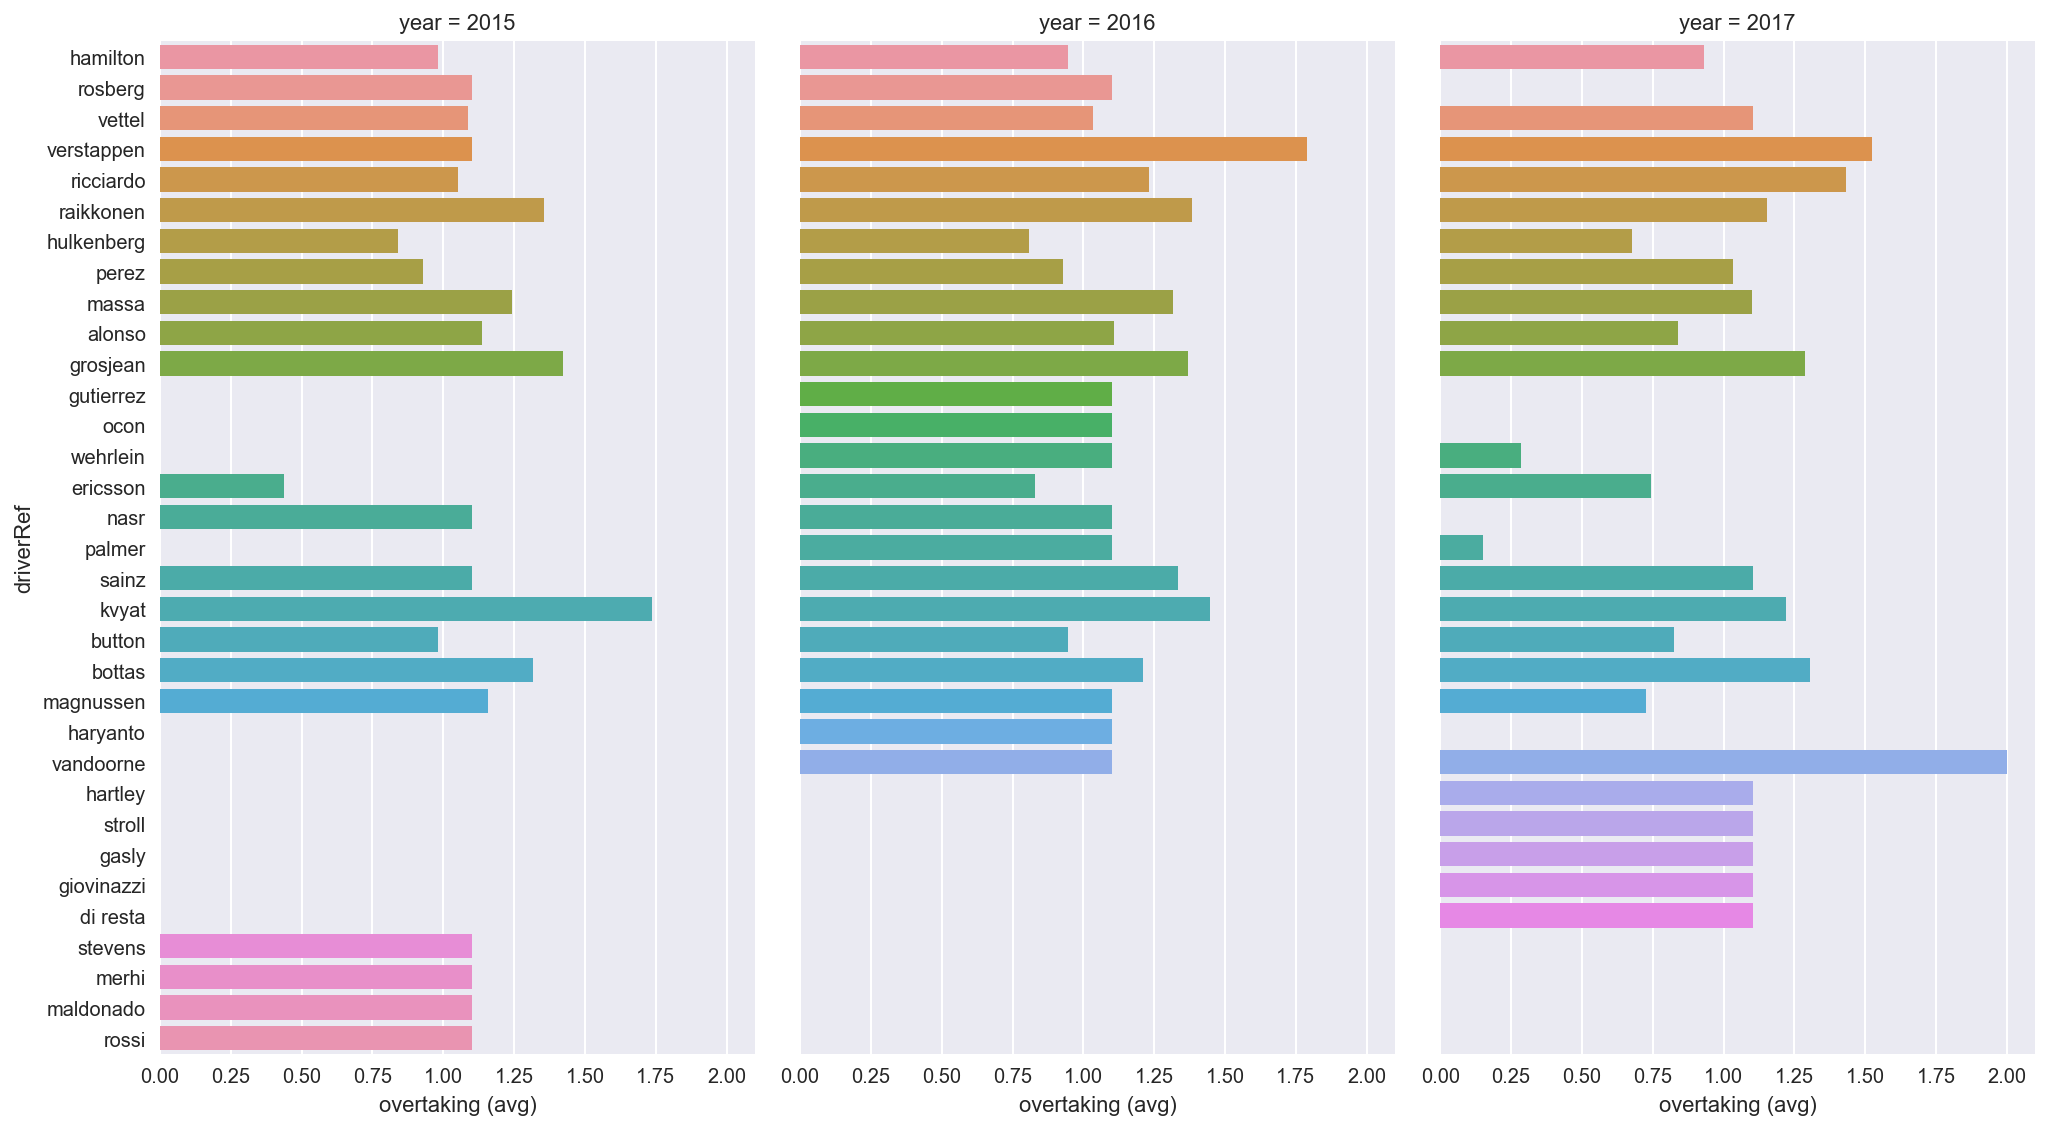

In [20]:
sns.set(font_scale=1)
g = sns.factorplot(y='driverRef', x="overtaking (avg)", col='year', kind="bar", orient='h',
                   data=dataset, size=8, aspect=0.6)